<div dir="rtl" style="text-align: right;">
    <h1 style="font-family: Vazir, sans-serif;">
        تمرین شماره ۲: درس پردازش زبان طبیعی - دانشگاه تهران، پائیز ۱۴۰۳
    </h1>
</div>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px;">
نام: عرفان شهابی
<br/>


<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
سوالات خودتان را می‌توانید از طریق ایمیل
 از طراح تمرین بپرسید.
•	سوال ۱ و ۲ – amirh.bonakdar@ut.ac.ir 
•	سوال ۳ - alikhorramfar@gmail.com

<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 18px; color: red; font-weight: bold;">
قوانین و توضیحاتی آخر فایل تمرین حتما به دقت مطالعه شود.
</div>

# **سوال اول:**

## *مجموعه داده*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    این کد به منظور پردازش و استخراج داده ها از مجموعه Cranfield Collection نوشته شده است که این مجموعه داده شامل اسناد و کوئری ها است که برای بازیابی هوشنمد اطلاعات استفاده می شود.
    هدف این کد بارگذاری اسناد، کوئری‌ها و قضاوت‌های مرتبط بودن آنها، و سپس نمایش اطلاعات اولیه و متا دیتاهای این مجموعه داده می‌باشد.
    ابتدا فایل cran.tar.gz که شامل مجموعه Cranfield است، از پوشه مشخص شده باز می‌شود و محتویات آن در پوشه cranfield_dataset استخراج می‌شود. سپس فایل cran.all.1400 هر سند در این فایل با شناسه‌ای به صورت .I <ID> شروع می‌شود و متن آن پس از مشخصات اولیه ذخیره می‌شود.اسناد به صورت دیکشنری documents ذخیره می‌شوند، که کلید آن‌ها doc_id (شناسه سند) و مقدارشان متن سند است. فایل cran.qry هم که شامل کوئری ها است نیز به روش مشابه پردازش میشود.هر کوئری در دیکشنری queries ذخیره می‌شود، که کلید آن شناسه کوئری و مقدارش متن کوئری است.
    <br>
    در مرحله بعد فایل cranqrel که شامل اطلاعات مرتبط بودن اسناد و کوئری‌ها است، پردازش می‌شود.
    هر خط از فایل شامل شناسه کوئری، شناسه سند و یک سطح مرتبط بودن (بین ۰ تا ۳) است.
    تنها اسنادی که سطح مرتبط بودن آن‌ها ۲ یا بالاتر است به عنوان مرتبط ذخیره می‌شوند.
    این اطلاعات در دیکشنری relevance_judgments ذخیره می‌شود، که کلید آن شناسه کوئری و مقدار آن مجموعه‌ای از شناسه اسناد مرتبط است.



In [1]:
#write your code here
import tarfile
import re
import numpy as np
import math
from collections import Counter

folder_path = '/Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/'

with tarfile.open(folder_path+"cran.tar.gz", "r:") as tar:
    tar.extractall(folder_path+"cranfield_dataset")


docs_path = folder_path+"cranfield_dataset/cran.all.1400"
queries_path = folder_path+"cranfield_dataset/cran.qry"
qrels_path = folder_path+"cranfield_dataset/cranqrel"


documents = {}
with open(docs_path, 'r') as file:
    content = file.read()
    docs = re.split(r"\.I ", content)[1:]  
    for doc in docs:
        lines = doc.splitlines()
        doc_id = lines[0].strip()
        doc_text = "\n".join(lines[2:])  
        documents[doc_id] = doc_text


queries = {}
with open(queries_path, 'r') as file:
    content = file.read()
    qry_sections = re.split(r"\.I ", content)[1:]  
    for idx, qry in enumerate(qry_sections):
        lines = qry.splitlines()
        query_text = "\n".join(lines[2:])  
        queries[idx + 1] = query_text  

relevance_judgments = {i + 1: set() for i in range(len(queries))}


with open(qrels_path, 'r') as file:
    for line in file:
        query_id, doc_id, relevance = map(int, line.split())
        
        if query_id and relevance >= 2:  
            relevance_judgments[query_id].add(str(doc_id))


def qrels_defs():
    print("Qrels Definitions:")
    print("0: Not Relevant")
    print("1: Marginally Relevant")
    print("2: Relevant")
    print("3: Highly Relevant")

def metadata(documents, queries, relevance_judgments):
    print("Dataset Metadata:")
    print(f"Total number of documents: {len(documents)}")
    print(f"Total number of queries: {len(queries)}")
    total_rels = sum(len(docs) for docs in relevance_judgments.values())
    print(f"Total number of relevance judgments: {total_rels}")
    print(f"Average judgments per query: {total_rels / len(queries):.2f}")

qrels_defs()
metadata(documents, queries, relevance_judgments)



Qrels Definitions:
0: Not Relevant
1: Marginally Relevant
2: Relevant
3: Highly Relevant
Dataset Metadata:
Total number of documents: 1400
Total number of queries: 225
Total number of relevance judgments: 1484
Average judgments per query: 6.60


/var/folders/mv/7bx_cn1n6zb77rddr70qj7fm0000gn/T/ipykernel_40259/4086110008.py:10: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(folder_path+"cranfield_dataset")


### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    این کد بارگذاری قضاوت‌های مرتبط بودن اسناد و کوئری‌ها در مجموعه داده Cranfield و دسته‌بندی آنها به دو گروه مرتبط و نا مرتبط را انجام می دهد. سپس قضاوت‌های مرتبط بودن مربوط به یک کوئری خاص به عنوان نمونه نمایش داده می‌شود. 
    ابتدا سه دیکشنری به نام‌های relevance_judgments، relevants و relevants2 برای ذخیره قضاوت‌های مرتبط بودن ساخته می‌شوند.
    هر سه دیکشنری کلیدهایی دارند که شناسه کوئری‌ها را از ۱ تا تعداد کوئری‌ها شامل می‌شوند. مقادیر هر کلید مجموعه‌ای از اسناد مرتبط یا غیرمرتبط هستند.
    <br>
    سپس فایل cranqrel که حاوی اطلاعات مرتبط بودن کوئری‌ها و اسناد است، خط به خط خوانده می‌شود.
    در هر خط، شناسه کوئری (query_id)، شناسه سند (doc_id) و سطح مرتبط بودن (relevance) استخراج می‌شود.
    اگر سطح مرتبط بودن بیشتر یا مساوی ۲ باشد، آن سند به عنوان مرتبط ذخیره می‌شود:
    در relevance_judgments به عنوان (شناسه سند, 'Relevant').
    در relevants به عنوان (شناسه سند, 'Relevant').
    در relevants2 فقط شناسه سند ذخیره می‌شود.
    در غیر این صورت، سند به عنوان غیرمرتبط به صورت (شناسه سند, 'Non Relevant') در relevance_judgments ذخیره می‌شود.
    پس از پردازش فایل، کد بررسی می‌کند که اگر برای یک کوئری خاص هیچ قضاوت مرتبط یا غیرمرتبطی ثبت نشده باشد، مقدار ("NA", "Non Relevant") را به آن اضافه کند تا نشان دهد هیچ قضاوتی برای آن کوئری موجود نیست.
    <br>
    در مرحله پایانی قضاوت های مربوط به کوئری اول چاپ میشوند و لیست result2 را هم چاپ میکنیم




In [4]:
#write your code here

relevance_judgments = {i + 1: set() for i in range(len(queries))}
relevants = {i + 1: set() for i in range(len(queries))}
relevants2 = {i + 1: set() for i in range(len(queries))}
with open(qrels_path, 'r') as file:
    for line in file:
        query_id, doc_id, relevance = map(int, line.split())
        if relevance >= 2:
            relevance_judgments[query_id].add((str(doc_id), "Relevant"))
            relevants[query_id].add((str(doc_id), "Relevant"))
            relevants2[query_id].add(str(doc_id))
        else:
            relevance_judgments[query_id].add((str(doc_id), "Non Relevant"))
            


for query_id in relevance_judgments:
    if not relevance_judgments[query_id]:
       
        relevance_judgments[query_id].add(("NA", "Non Relevant"))

query_id_to_check = 1  
if query_id_to_check in relevance_judgments:
    print(f"Relevance judgments for query {query_id_to_check}:")
    for doc_id, relevance in relevance_judgments[query_id_to_check]:
        print(f"Document {doc_id} is {relevance}")
else:
    print(f"No relevance judgments for query {query_id_to_check}")
print(relevants2)


Relevance judgments for query 1:
Document 14 is Relevant
Document 102 is Relevant
Document 875 is Relevant
Document 184 is Relevant
Document 486 is Non Relevant
Document 13 is Relevant
Document 52 is Relevant
Document 378 is Relevant
Document 879 is Relevant
Document 876 is Relevant
Document 31 is Relevant
Document 185 is Relevant
Document 29 is Relevant
Document 858 is Relevant
Document 859 is Relevant
Document 66 is Relevant
Document 497 is Relevant
Document 95 is Relevant
Document 880 is Relevant
Document 195 is Relevant
Document 462 is Relevant
Document 30 is Relevant
Document 142 is Relevant
Document 56 is Relevant
Document 57 is Relevant
Document 15 is Relevant
Document 37 is Relevant
Document 12 is Relevant
Document 51 is Relevant
{1: {'184', '195', '858', '29', '880', '37', '66', '30', '859', '57', '13', '15', '102', '31', '52', '56', '142', '185', '875', '879', '12', '14', '51', '876', '462', '497', '95', '378'}, 2: {'184', '442', '858', '390', '857', '864', '859', '856', '877

## *بخش اول*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    در این کد میخواهیم پیش پردازش هایی مثل توکنایز کردن و ساخت وکب را انجام دهیم . به همین منظور ابتدا تابع tokenize را تعریف میکنیم که ابتدا متن ورودی را به حروف کوچک تبدیل کند، سپس آن ها را با استفاده از فاصله بین کلمات به لیستی از کلمات تبدیل کند.
    <br>
    در مرحله بعد تابع build_vocab را تعریف کردیم که با استفاده از تابع توکنایز، توکن های تمام متون در دیکشنری text را استخراج کند و سپس از طریق پردازش تمام متن ها و ترکیب توکن های آن ها لیستی از تمام کلمات یکتا ایجاد کند. در نهایت لیست وکب به صورت مرتب و بدون عنصر تکراری بازگردانده می شود.
    <br>
    در این کد تابع clean_vocab برای حذف کاراکتر های اضافه در کلمات داخل وکب نوشته شده است و با استفاده از regex کلمات را از هرگونه کاراکتر های اضافی پاکسازی میکنیم و سپس آن ها را به لیست cleaned_vocab اضافه میکنیم.

In [5]:
#write your code here

def tokenize(text):
    return text.lower().split()

def build_vocab(texts):
    all_tokens = []
    for text in texts.values():
        tokens = tokenize(text) 
        all_tokens.extend(tokens) 
    return sorted(list(set(all_tokens)))  

vocab = build_vocab(documents)
def clean_vocab(vocab):
    cleaned_vocab = []
    for word in vocab:
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        if word:  
            cleaned_vocab.append(word.lower()) 
    return cleaned_vocab

vocab = clean_vocab(vocab)
print(vocab)



['density', 'displacement', 'equivalent', 'exact', 'fat', 'first', 'flow', 'freeze', 'freezing', 'freezing', 'heat', 'lowbeta', 'magnus', 'matching', 'mesh', 'mixed', 'nonviscous', 'ogee', 'oseen', 'outer', 'oxygenlike', 'plane', 'qualitatively', 'quasicylinder', 'reservoir', 'second', 'similar', 'slenderbody', 'slice', 'stokes', 'straightthrough', 'tailored', 'that', 'thermal', 'twodiagram', 'v', 'velocity', 'wall', 'blastwave', 'contribution', 'dead', 'viscous', '0010', '01', '04', '08a', '1', '1', '1', '1', '1300', '13', '15', '150', '18', '1914', '1916', '1921', '1925', '1932', '1933', '1933', '1934', '1936', '1938', '1941', '1943', '1945', '1945', '1950', '1953', '1955', '1956', '1956', '1958', '2', '2', '234', '20', '24', '3', '3', '31', '30', '4', '4', '400', '42', '5', '6', '7', '9', 'pressure', 'a', 'a', 'a', 'abstract', 'acting', 'air', 'air', 'along', 'although', 'amr', 'and', 'annex', 'aob', 'approx', 'approx', 'approximately', 'approximately', 'argon', 'argonfree', 'as', '

### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
    در این کد TF را برای اسناد و کوئری ها محاسبه کرده ام
    در مرحله اول تابع compute_tf_matrix را تعریف کرده ام که ورودی های text و vocab را دریافت میکند. این تابع یک ماتریس می سازد با اندازه تعداد اسناد یا کوئری ها و تعداد واژگان درون وکب و مقدار هر درایه ماتریس نشان دهنده فرکانس یک کلمه خاص در یک سند یا کوئری خاص است.
    در این تابع یک دیکشنری vocab_index ایجاد می شود که هر کلمه از وکب را به یک اندیس یکتا نگاشت میدهد تا دسترسی به موقعیت کلمه سریع تر انجام شود. سپس برای هر سند و یا کوئری در text تابع، فرکانش کلمات آن را محاسبه میکند پ با استفاده از vocab_index فرکانس هر کلمه در ماتریس مورد نظر قرار داده میشود.
    در مرحله بعد نیز ماتریس اسناد و کوئری ها محاسبه شده و نمایش داده میشود.
    با توجه به این که این ماتریس ها sparse هستند و اکثر درایه ها ی آن ها صفر می باشد، نمایش ماتریس در فضای محدود ژوپیتر نوت بوک اکثرا با درایه های صفر چاپ میشود که برای اینکه ببینیم ماتریس درست ساخته شده است یا خیر تعداد درایه های غیر صفر هر ماتریس محاسبه شده و نمایش داده میشود.

In [4]:
#write your code here

def compute_tf_matrix(texts, vocab):
    
    tf_matrix = np.zeros((len(texts), len(vocab)))
    vocab_index = {word: idx for idx, word in enumerate(vocab)}  

    for i, (doc_id, text) in enumerate(texts.items()):
        tf_counts = Counter(tokenize(text)) 
        for word, count in tf_counts.items():
            if word in vocab_index:
                tf_matrix[i][vocab_index[word]] = count
    return tf_matrix
tf_matrix_documents = compute_tf_matrix(documents, vocab)
tf_matrix_queries = compute_tf_matrix(queries, vocab)

print("TF Matrix for Documents:\n", tf_matrix_documents)
print("TF Matrix for Queries:\n", tf_matrix_queries)
print("Shape of TF Matrix for Documents:", tf_matrix_documents.shape)
print("Shape of TF Matrix for Queries:", tf_matrix_queries.shape)
print("First 5 rows of TF Matrix for Documents:\n", tf_matrix_documents[:5])
print("First 5 rows of TF Matrix for Queries:\n", tf_matrix_queries[:5])
non_zero_documents = np.count_nonzero(tf_matrix_documents)  
non_zero_queries = np.count_nonzero(tf_matrix_queries)  

print("Number of non-zero elements in TF Matrix for Documents:", non_zero_documents)
print("Number of non-zero elements in TF Matrix for Queries:", non_zero_queries)


TF Matrix for Documents:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
TF Matrix for Queries:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Shape of TF Matrix for Documents: (1400, 15391)
Shape of TF Matrix for Queries: (225, 15391)
First 5 rows of TF Matrix for Documents:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 5 rows of TF Matrix for Queries:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of non-zero elements in TF Matrix for Documents: 113222
Number of non-zero elements in TF Matrix for Queries: 3305


## *بخش دوم*

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
هدف این کد محاسبه ماتریس tf-idf برای مجموعه اسناد و کوئری ها است.
    در مرحله اول این کد تابع compute_idf نوشته شده است که برای هر کلمه در وکب مقدار idfرا محاسبه میکند. متغیر containing_docs تعداد اسنادی را میشمرد که حاوی کلمه مورد نظر هستند وسپس با استفاده از فرمول idf، این مقدار برای هر کلمه محاسبه شده و درون دیکشنری idf ریخته میشود.
    <br>
    سپس تابع compute_tfidf نوشته شده است که این تابع ماتریس tf_idf را با استفاده از ماتریس tf و مقادیر idf محاسبه میکند.
    برای هر سند و یا هر کوئری و برای هر کلمه این مقدار با ضرب tf در idf محاسبه شده و درون ماترس tfidf_matrix دخیره می گردد.
    <br>
    سپس مقادیر tf و tf-idf برای اسناد و کوئری ها محاسبه شده و در ماتریس مربوطه ریخته میشوند و ماتریس های tf-idf کوئری ها و اسناد چاپ میشوند. این ماتریس ها sparse هستند و اکثر درایه های آن ها مقدار صفر را دارند.

In [5]:
#write your code here
def compute_idf(documents, vocab):
    num_docs = len(documents)
    idf = {}
    for word in vocab:
        containing_docs = sum(1 for doc in documents.values() if word in tokenize(doc))
        idf [word] = math.log(num_docs / (1+containing_docs))
    return idf
def compute_tfidf(tf_matrix, vocab, idf):
    tfidf_matrix = np.zeros(tf_matrix.shape)
    for i in range(tf_matrix.shape[0]):
        for j , word in enumerate(vocab):
            tfidf_matrix[i][j] = tf_matrix[i][j] * idf[word]
    return tfidf_matrix
idf_documents = compute_idf(documents, vocab)
idf_queries = compute_idf(queries, vocab)
tfidf_matrix_documents = compute_tfidf(tf_matrix_documents, vocab, idf_documents)
tfidf_matrix_queries = compute_tfidf(tf_matrix_queries, vocab, idf_queries)
print("TF-IDF Matrix for docs:\n", tfidf_matrix_documents)
print("TF-IDF Matrix for queries:\n", tfidf_matrix_queries)

TF-IDF Matrix for docs:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
TF-IDF Matrix for queries:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## *بخش سوم*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این کد سعی کردم بردار کلمه ها را با استفاده از ماتریس co ocurrence و PPMI برای کلمات درون وکب محاسبه کنم.
در مرحله اول تابع محاسبه بردار کلمات را تعریف کردم که مقادیر document, vocab , window size را دریافت میکند. در این کد من سایز پنجره را ۲ در نظر گرفتم.
در ابتدای تابع compute_word_vectors، یک ماتریس وقوع مشترک صفر با ابعاد (len(vocab), len(vocab)) ایجاد می‌شود که رابطه بین کلمات در واژگان را ذخیره خواهد کرد. با استفاده از یک دیکشنری vocab_index، هر کلمه در واژگان به یک اندیس (ایندکس) منحصربه‌فرد مرتبط می‌شود.
در این کد برای هر کلمه در متن محدوده ای به اندازه پنجره ۲ همسایگی کلمات همجوار را در نظر میگیرد.
در صورتی که کلمه همسایه در وکب باشد مقدار co ocurrence بین کلمه مورد نظر و همسایگان آن در ماتریس coocuurence_matrix افزایش داده می شود.
<br><br>
برای محاسبه ماتریس PPMI سه مقدار کلی را محاسبه میکنم.
اول total_count که مجموع تمام مقادیر در ماتریکس coocurrence است. دوم word_count که مجموع وقوع هر کلمه  در ستون های ماتریس coocurrence است و سوم context_count که مجموع وقوع هر کلمه به عنوان همسایه در ستون های ماتریس coocurrence است.
برای هر جفت کلمه i, j احتمال وقوت مشترک کلمه، همسایه آن (p_wc)، احتمال کلمه (p_w) و احتمال فردی همسایه (p_c) محاسبه می شود.
اگر مقدار p_wc بزرگ تر از ۰ باشید مقدار ppmi آن را از طریق قرمول مربوطه حساب میکنم و در ماتریکس ppmi_matrix ذخیره میشود.
<br>
سپس یک دیکشنری word_vector ایجاد میشود که هر کلمه را به بردار ppmi نربپطه متصل میکنمد و هر هر بردار یک ردیف از ماتریس ppmi است که احتمال همنشینی آن کلمه را با سایر کلمات نشان میدهد. در پایان نیز بردار های کلمات چاپ میشوند.


In [30]:
#write your code here
import numpy as np

def compute_word_vectors(documents, vocab, window_size=2):
  
    vocab_index = {word: idx for idx, word in enumerate(vocab)}
    cooccurrence_matrix = np.zeros((len(vocab), len(vocab)))

    for text in documents.values():
        tokens = tokenize(text) 
        for i, word in enumerate(tokens):
            if word in vocab_index:
                word_idx = vocab_index[word]
               
                for j in range(max(0, i - window_size), min(len(tokens), i + window_size + 1)):  
                    if i != j and tokens[j] in vocab_index:
                        neighbor_idx = vocab_index[tokens[j]]
                        cooccurrence_matrix[word_idx][neighbor_idx] += 1


    total_count = np.sum(cooccurrence_matrix) 
    word_count = np.sum(cooccurrence_matrix, axis=1) 
    context_count = np.sum(cooccurrence_matrix, axis=0)  

    ppmi_matrix = np.zeros_like(cooccurrence_matrix)

    for i in range(cooccurrence_matrix.shape[0]):
        for j in range(cooccurrence_matrix.shape[1]):
            p_wc = cooccurrence_matrix[i][j] / total_count 
            p_w = word_count[i] / total_count  
            p_c = context_count[j] / total_count 
            if p_wc > 0:
                ppmi_matrix[i][j] = max(0, np.log(p_wc / (p_w * p_c)))

   
    word_vectors = {}
    for word, idx in vocab_index.items():
        word_vectors[word] = ppmi_matrix[idx]

    return word_vectors



word_vectors = compute_word_vectors(documents, vocab, window_size=2)
print("Word Vectors:\n", word_vectors)


Word Vectors:
 {'density': array([0., 0., 0., ..., 0., 0., 0.]), 'displacement': array([0., 0., 0., ..., 0., 0., 0.]), 'equivalent': array([0., 0., 0., ..., 0., 0., 0.]), 'exact': array([0., 0., 0., ..., 0., 0., 0.]), 'fat': array([0., 0., 0., ..., 0., 0., 0.]), 'first': array([0., 0., 0., ..., 0., 0., 0.]), 'flow': array([0., 0., 0., ..., 0., 0., 0.]), 'freeze': array([0., 0., 0., ..., 0., 0., 0.]), 'freezing': array([0., 0., 0., ..., 0., 0., 0.]), 'heat': array([0., 0., 0., ..., 0., 0., 0.]), 'lowbeta': array([0., 0., 0., ..., 0., 0., 0.]), 'magnus': array([0., 0., 0., ..., 0., 0., 0.]), 'matching': array([0., 0., 0., ..., 0., 0., 0.]), 'mesh': array([0., 0., 0., ..., 0., 0., 0.]), 'mixed': array([0., 0., 0., ..., 0., 0., 0.]), 'nonviscous': array([0., 0., 0., ..., 0., 0., 0.]), 'ogee': array([0., 0., 0., ..., 0., 0., 0.]), 'oseen': array([0., 0., 0., ..., 0., 0., 0.]), 'outer': array([0., 0., 0., ..., 0., 0., 0.]), 'oxygenlike': array([0., 0., 0., ..., 0., 0., 0.]), 'plane': array([

### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد برای محاسبه بردار های سند ها و کوئری ها نوشته شده است. ابتدا تابع compute_doc_vectors تعریف شده است که سند ها و بردار کلمات را دریافت میکند.
ابتدا به ازای هر سند، کلمات را با استفاده از تابع tokenize که در بخش های قبلی تعریف شد را از متن استخراج میکند و سپس برای هر کلمه ای که در مجموعه وکب موجوود ایت، بردار آن را به بردار سند اضافه میکند و در نهایت میانگین بردار کلمات موجود در سند به عنپان بردار ویژگی سند در نظر گرفته میشود. در مرحله پایانی نیز ماتریکس بردار اسناد ریترن میشود.
همین مراحل با تابع compute_query_vectors نیز انجام میشود و ماتریکس بردار کوئری ها را بر میگرداند.
سپس با استفاده از توابع ماتریس بردارهای اسناد و کوئری ها ساخته میشوند و در پایان ماتریس آن ها و ابعاد ماتریس ها چاپ میشوند.

In [31]:
#write your code here
def compute_doc_vectors(documents, word_vectors):
 
    num_docs = len(documents)
    vector_size = len(word_vectors[next(iter(word_vectors))])
    document_vectors_matrix = np.zeros((num_docs, vector_size))
    for idx, (doc_id, text) in enumerate(documents.items()):
        tokens = tokenize(text)  
        doc_vector = np.zeros(vector_size)  
        valid_token_count = 0

        for word in tokens:
            if word in word_vectors:
                doc_vector += word_vectors[word]  
                valid_token_count += 1
        if valid_token_count > 0:
            doc_vector /= valid_token_count  
        document_vectors_matrix[idx] = doc_vector  

    return document_vectors_matrix

def compute_query_vectors(queries, word_vectors):
    num_queries = len(queries)
    vector_size = len(word_vectors[next(iter(word_vectors))])
    query_vectors_matrix = np.zeros((num_queries, vector_size))
    
    for idx, (query_id, text) in enumerate(queries.items()):
        tokens = tokenize(text)  
        query_vector = np.zeros(vector_size) 
        valid_token_count = 0

        for word in tokens:
            if word in word_vectors:
                query_vector += word_vectors[word]  
                valid_token_count += 1
        if valid_token_count > 0:
            query_vector /= valid_token_count  
        query_vectors_matrix[idx] = query_vector  

    return query_vectors_matrix


document_vectors_matrix = compute_doc_vectors(documents, word_vectors)
query_vectors_matrix = compute_query_vectors(queries, word_vectors)


print("Document Vectors Matrix:")
print(document_vectors_matrix)

print("\nDocument Vectors (Dimensions):")
print(document_vectors_matrix.shape)

print("\nQuery Vectors Matrix:")
print(query_vectors_matrix)

print("\nQuery Vectors (Dimensions):")
print(query_vectors_matrix.shape)


Document Vectors Matrix:
[[0.         0.         0.         ... 0.         0.         0.14411279]
 [0.         0.         0.         ... 0.         0.         0.10934901]
 [0.         0.         0.         ... 0.         0.         0.13395254]
 ...
 [0.         0.         0.         ... 0.         0.         0.10249686]
 [0.         0.         0.         ... 0.         0.         0.1653735 ]
 [0.         0.         0.         ... 0.         0.         0.05753178]]

Document Vectors (Dimensions):
(1400, 15391)

Query Vectors Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.20608082]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.3653251 ]
 [0.         0.         0.         ... 0.         0.         0.25245579]]

Query Vectors (Di

## *بخش چهارم*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد به منظور محاسبه شباهت کسینوسی و به دست آوردن دقت و میانگین دقت در ۵ سند اول بازیابی شده نوشته شده است. در این کد ابتدا دیکشنری tf_retrieves تعریف شده است و با توجه به query_id , doc_id و با استفاده از متد cosine_similarity، شباهت کسینوسی هر سند با هر کوئری محاسبه میشود و query id و doc id و شباهت بین آن ها در صورتی که مقداری بیتشر از 0.5 داشته باشد در دیکشنری tf_retrieves ذخیره میگردد. چون شمارش ماتریس از صفر است من مقادیر query id , doc id را با ۱ جمع کردم تا مقدار اصلی شناسه کوئری و سند را  ذخیره کنم.
سپس تابع precision_at_k را تعریف کردم که این تابع سند های بازیابی شده را بر اساس شباهت مرتب میکند و  از بین ۵ سند اول با استفاده از دیکشنری که در اول پروژه داشتیم و اسناد مرتبط را در آن ذخیره کردیم تعداد سند های مرتبط را محاسبه میکند، سپس دقت را با تقسیم تعداد سند های مرتبط در ۵ سند اول بر ۵ به دست می آورد.
در مرحله بعد با استفاده از تابع precision_at_k مقدار Precision @ 5 هر سند و کوئری محاسبه شده ومیانگین دقت در ۵ سند اول برای کوئری ها را محاسبه میکنم.
سپس دقت در ۵ سند اول برای کوئری ها و میانگین دقت در ۵ سند اول برای هر کوئری محاسبه شده و چاپ میشود.
مقدار میانگین دقت برای کوئری ها عدد 0.009 به دست آمده که به این معناست به طور میانگین 0.9 درصد بین اسناد بازیابی شده در ۵ سند اول مرتبط  هستند که این اصلا مقدار خوبی نیست و به دلیل آن است که استفاده از فرکانس کلمات به تنهایی نمیتواند معیار خوبی برای میزان شباهت سند و کوئری باشد.

In [19]:
#write your code here
from sklearn.metrics.pairwise import cosine_similarity


tf_retrieves = {}


for query_id in range(len(tf_matrix_queries)):
    for doc_id in range(len(tf_matrix_documents)):
        similarity = cosine_similarity([tf_matrix_queries[query_id]], [tf_matrix_documents[doc_id]])[0][0]
        if query_id + 1 not in tf_retrieves:
            tf_retrieves[query_id + 1] = []
        if similarity > 0.5:
            tf_retrieves[query_id + 1].append((doc_id + 1, similarity))


def precision_at_k(retrieved_docs, relevant_docs, k=5):
    top_k = [doc_id for doc_id, _ in sorted(retrieved_docs, key=lambda x: x[1], reverse=True)[:k]]
    
    relevant_count = sum(1 for doc in top_k if doc in relevant_docs)
    
    return relevant_count / k
precision_scores = {}
for query_id, results in tf_retrieves.items():
    
    
    precision_scores[query_id] = precision_at_k(results, relevants2, k=5)

mean_precision_at_5 = sum(precision_scores.values()) / len(precision_scores)


print("Precision@5 for each query:")
for query_id, precision in precision_scores.items():
    print(f"Query {query_id}: Precision@5 = {precision:.4f}")

print(f"\nMean Precision@5: {mean_precision_at_5:.4f}")


Precision@5 for each query:
Query 1: Precision@5 = 0.0000
Query 2: Precision@5 = 0.2000
Query 3: Precision@5 = 0.0000
Query 4: Precision@5 = 0.2000
Query 5: Precision@5 = 0.0000
Query 6: Precision@5 = 0.0000
Query 7: Precision@5 = 0.6000
Query 8: Precision@5 = 0.0000
Query 9: Precision@5 = 0.0000
Query 10: Precision@5 = 0.0000
Query 11: Precision@5 = 0.4000
Query 12: Precision@5 = 0.0000
Query 13: Precision@5 = 0.2000
Query 14: Precision@5 = 0.0000
Query 15: Precision@5 = 0.0000
Query 16: Precision@5 = 0.2000
Query 17: Precision@5 = 0.2000
Query 18: Precision@5 = 0.0000
Query 19: Precision@5 = 0.2000
Query 20: Precision@5 = 0.4000
Query 21: Precision@5 = 0.2000
Query 22: Precision@5 = 0.6000
Query 23: Precision@5 = 0.0000
Query 24: Precision@5 = 0.2000
Query 25: Precision@5 = 0.2000
Query 26: Precision@5 = 0.4000
Query 27: Precision@5 = 0.0000
Query 28: Precision@5 = 0.0000
Query 29: Precision@5 = 0.4000
Query 30: Precision@5 = 0.0000
Query 31: Precision@5 = 0.0000
Query 32: Precision@

### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد به منظور محاسبه شباهت کسینوسی و به دست آوردن دقت و میانگین دقت در ۵ سند اول بازیابی شده نوشته شده است. در این کد ابتدا دیکشنری tfidf_retrieves تعریف شده است و با توجه به query_id , doc_id در ماتریس tf-idf برای اسناپ و کوئری ها و با استفاده از متد cosine_similarity، شباهت کسینوسی هر سند با هر کوئری محاسبه میشود و query id و doc id و شباهت بین آن ها در صورتی که مقداری بیتشر از 0.5 داشته باشد در دیکشنری tf_retrieves ذخیره میگردد. چون شمارش ماتریس از صفر است من مقادیر query id , doc id را با ۱ جمع کردم تا مقدار اصلی شناسه کوئری و سند را  ذخیره کنم.
سپس تابع precision_at_k را تعریف کردم که این تابع سند های بازیابی شده را بر اساس شباهت مرتب میکند و  از بین ۵ سند اول با استفاده از دیکشنری که در اول پروژه داشتیم و اسناد مرتبط را در آن ذخیره کردیم تعداد سند های مرتبط را محاسبه میکند، سپس دقت را با تقسیم تعداد سند های مرتبط در ۵ سند اول بر ۵ به دست می آورد.
در مرحله بعد با استفاده از تابع precision_at_k مقدار Precision @ 5 هر سند و کوئری محاسبه شده ومیانگین دقت در ۵ سند اول برای کوئری ها را محاسبه میکنم.
سپس دقت در ۵ سند اول برای کوئری ها و میانگین دقت در ۵ سند اول برای هر کوئری محاسبه شده و چاپ میشود.
مقدار میانگین دقت برای کوئری ها عدد 0.009 به دست آمده که به این معناست به طور میانگین 0.9 درصد بین اسناد بازیابی شده در ۵ سند اول مرتبط  هستند که این اصلا مقدار خوبی نیست.

In [27]:
#write your code here

tfidf_retrieves = {}
for query_id in range(len(tfidf_matrix_queries)):
    for doc_id in range(len(tfidf_matrix_documents)):
        similarity = cosine_similarity([tfidf_matrix_queries[query_id]], [tfidf_matrix_documents[doc_id]])[0][0]
 
        if query_id + 1 not in tfidf_retrieves:
            tfidf_retrieves[query_id + 1] = []
        if similarity > 0.5:
            tfidf_retrieves[query_id + 1].append((doc_id + 1, similarity))

def precision_at_k(retrieved_docs, relevant_docs, k=5):
   
    top_k = [doc_id for doc_id, _ in sorted(retrieved_docs, key=lambda x: x[1], reverse=True)[:k]]
    relevant_count = sum(1 for doc in top_k if doc in relevant_docs)

    return relevant_count / k


tfidf_precision_scores = {}
for query_id, results in tfidf_retrieves.items():

    
    
    tfidf_precision_scores[query_id] = precision_at_k(results, relevants2, k=5)


mean_precision_at_5 = sum(tfidf_precision_scores.values()) / len(tfidf_precision_scores)


print("Precision@5 for each query:")
for query_id, precision in tfidf_precision_scores.items():
    print(f"Query {query_id}: Precision@5 = {precision:.4f}")

print(f"\nMean Precision@5: {mean_precision_at_5:.4f}")


Precision@5 for each query:
Query 1: Precision@5 = 0.0000
Query 2: Precision@5 = 0.0000
Query 3: Precision@5 = 0.0000
Query 4: Precision@5 = 0.0000
Query 5: Precision@5 = 0.0000
Query 6: Precision@5 = 0.0000
Query 7: Precision@5 = 0.0000
Query 8: Precision@5 = 0.0000
Query 9: Precision@5 = 0.0000
Query 10: Precision@5 = 0.0000
Query 11: Precision@5 = 0.0000
Query 12: Precision@5 = 0.0000
Query 13: Precision@5 = 0.0000
Query 14: Precision@5 = 0.0000
Query 15: Precision@5 = 0.0000
Query 16: Precision@5 = 0.0000
Query 17: Precision@5 = 0.0000
Query 18: Precision@5 = 0.0000
Query 19: Precision@5 = 0.0000
Query 20: Precision@5 = 0.0000
Query 21: Precision@5 = 0.0000
Query 22: Precision@5 = 0.0000
Query 23: Precision@5 = 0.0000
Query 24: Precision@5 = 0.0000
Query 25: Precision@5 = 0.0000
Query 26: Precision@5 = 0.0000
Query 27: Precision@5 = 0.0000
Query 28: Precision@5 = 0.0000
Query 29: Precision@5 = 0.0000
Query 30: Precision@5 = 0.0000
Query 31: Precision@5 = 0.0000
Query 32: Precision@

### ج

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد به منظور محاسبه شباهت کسینوسی و به دست آوردن دقت و میانگین دقت در ۵ سند اول بازیابی شده نوشته شده است. در این کد ابتدا دیکشنری ppmi_retrieves تعریف شده است و با توجه به query_id , doc_id در ماتریس ppmi اسناد و کوئری ها برای اسناپ و کوئری ها و با استفاده از متد cosine_similarity، شباهت کسینوسی هر سند با هر کوئری محاسبه میشود و query id و doc id و شباهت بین آن ها در صورتی که مقداری بیتشر از 0.5 داشته باشد در دیکشنری tf_retrieves ذخیره میگردد. چون شمارش ماتریس از صفر است من مقادیر query id , doc id را با ۱ جمع کردم تا مقدار اصلی شناسه کوئری و سند را  ذخیره کنم.
سپس تابع precision_at_k را تعریف کردم که این تابع سند های بازیابی شده را بر اساس شباهت مرتب میکند و  از بین ۵ سند اول با استفاده از دیکشنری که در اول پروژه داشتیم و اسناد مرتبط را در آن ذخیره کردیم تعداد سند های مرتبط را محاسبه میکند، سپس دقت را با تقسیم تعداد سند های مرتبط در ۵ سند اول بر ۵ به دست می آورد.
در مرحله بعد با استفاده از تابع precision_at_k مقدار Precision @ 5 هر سند و کوئری محاسبه شده ومیانگین دقت در ۵ سند اول برای کوئری ها را محاسبه میکنم.
سپس دقت در ۵ سند اول برای کوئری ها و میانگین دقت در ۵ سند اول برای هر کوئری محاسبه شده و چاپ میشود.
مقدار میانگین دقت برای کوئری ها عدد 0.16 به دست آمده که از دو روش قبلی بهتر است و بدین معناست که به طور میانگین ۱۶ درصد اسناد در ۵ سند اول بازیابی شده برای هر کوئری مرتبط بوده اند.

In [32]:
#write your code here

ppmi_retrieves = {}


for query_id in range(len(query_vectors_matrix)):
    for doc_id in range(len(document_vectors_matrix)):
        similarity = cosine_similarity([query_vectors_matrix[query_id]], [document_vectors_matrix[doc_id]])[0][0]
        if query_id + 1 not in ppmi_retrieves:
            ppmi_retrieves[query_id + 1] = []
        if similarity > 0.5:
            ppmi_retrieves[query_id + 1].append((doc_id + 1, similarity))


def precision_at_k(retrieved_docs, relevant_docs, k=5):

    top_k = [doc_id for doc_id, _ in sorted(retrieved_docs, key=lambda x: x[1], reverse=True)[:k]]
    
    relevant_count = sum(1 for doc in top_k if doc in relevant_docs)
    
    return relevant_count / k


ppmi_precision_scores = {}
for query_id, results in ppmi_retrieves.items():
    
    
    ppmi_precision_scores[query_id] = precision_at_k(results, relevants2, k=5)


mean_precision_at_5 = sum(ppmi_precision_scores.values()) / len(ppmi_precision_scores)


print("Precision@5 for each query:")
for query_id, precision in ppmi_precision_scores.items():
    print(f"Query {query_id}: Precision@5 = {precision:.4f}")

print(f"\nMean Precision@5: {mean_precision_at_5:.4f}")


Precision@5 for each query:
Query 1: Precision@5 = 0.4000
Query 2: Precision@5 = 0.4000
Query 3: Precision@5 = 0.2000
Query 4: Precision@5 = 0.0000
Query 5: Precision@5 = 0.2000
Query 6: Precision@5 = 0.0000
Query 7: Precision@5 = 0.6000
Query 8: Precision@5 = 0.2000
Query 9: Precision@5 = 0.2000
Query 10: Precision@5 = 0.2000
Query 11: Precision@5 = 0.4000
Query 12: Precision@5 = 0.0000
Query 13: Precision@5 = 0.4000
Query 14: Precision@5 = 0.0000
Query 15: Precision@5 = 0.0000
Query 16: Precision@5 = 0.0000
Query 17: Precision@5 = 0.0000
Query 18: Precision@5 = 0.0000
Query 19: Precision@5 = 0.2000
Query 20: Precision@5 = 0.2000
Query 21: Precision@5 = 0.0000
Query 22: Precision@5 = 0.4000
Query 23: Precision@5 = 0.4000
Query 24: Precision@5 = 0.4000
Query 25: Precision@5 = 0.0000
Query 26: Precision@5 = 0.4000
Query 27: Precision@5 = 0.0000
Query 28: Precision@5 = 0.0000
Query 29: Precision@5 = 0.2000
Query 30: Precision@5 = 0.4000
Query 31: Precision@5 = 0.0000
Query 32: Precision@

# **سوال دوم:**

## *مجموعه داده*

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این قسمت از کد این سوال سعی کردم داده های مربوط به مجموعه داده imdb را بارگذاری کنم. ابتدا کتاب خانه های مورد نیاز را ایمپورت کردم. کتابخانه kras.datasets برای بارگذاری مجموعه داد imdb و کتابخانه torvh.utils.data برای استفاده از ابزار های pytorch حهت مدیریت داده و استفاده در مدل های یادگیری.
سپس با استفاده از متد imdb.load_data داده های این مجموعه را بارگذاری کردم که این داده ها به دو بخش تقسیم شده اند. x_train که مجموعه دادده های ورودی که همان نظرات هستند برای آموزش مدل، و y_train برچسب های مربوط به داده های ورودیکه نشان دهنده نظرات مثبت و یا منفی هستند.
در اینجا فقط بخش آموزش داده ها بارگذاری میشوند.

In [6]:
#write your code here
from keras.datasets import imdb
import numpy as np
from torch.utils.data import DataLoader, Dataset

(x_train, y_train), (_, _) = imdb.load_data()



## *بخش اول*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این قسمت از کد سعی شده که اندازه داده های آموزشی کاهش پیدا کند. در این کد ابتدا از کتابخانه imdb داده ها را بارگذاری کرده ام. این داده ها به دو بخش ترین و تست تقسیم شده است که در این کد داده های تست نادیده گرفته شده. سپس ۱۰۰۰۰ نمونه اول از داده های آموزشی را انتخاب کردم تا حجم داده ها را کاهش دهم. در مرحله آخر اندازه نمونه های آموزشی انتخاب شده را چاپ کردم تا مطمئن شوم کاهش حجم داده به درستی انجام شده.

In [32]:
#write your code here
import torch

(x_train, y_train), (_, _) = imdb.load_data()


x_train = x_train[:10000]
y_train = y_train[:10000]

print(f"Sample size: {len(x_train)}")


Sample size: 10000


### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این کد ابتدا کتابخانه random برای تولید نمونه های منفی با استفاده از اعداد تصادفی را وارد کرده ام.
سپس window size را برابر ۲ گرفتم به معنای این که دو کلمه کنار کلمه هدف به عنوان همسایه مرتبط در نظر گرفته شوند. سپس متغیر num_negative_smaples رو برابر ۴ تعریف کردم که به ازای هر کلمه هدف ۴ نمونه منفی در نظر گرفته بشه.
در مرحله بعد word_index را تعریف کردم که نگاشت کلمات به اندیس ها در مجمموعه داده انجام بشه و index_word معکوس word_inex است که اندیس ها را به کلمات نگاشت میکند.
در مرحله بعد تابع ساخت سمپل های مثبت را تعریف کردم که این تابع نمونه های مثبت را برای مدل توبید میکند. این تابع در هر جمله برای کلمه تارگت، ۲ کلمه مجاور را به عنولن کلمه کانتکست در نظر میگیرد و هر زوج (target_word , context_word) را در لیست positive_samples ذخیره میکند.
در مرحلعه بعد تابع ساخت نمونه های منفی تعریف شده که به این صورت کار میکند که برای هر جفت کلمه تارگت و کانتکست  از positive_samples، چندین نمونه منفی تولید می‌کند. نمونه منفی به این صورت است که یک کلمه تصادفی از واژگان انتخاب می‌شود و با کلمه زمینه جایگزین می‌شود.
تعداد نمونه‌های منفی برای هر نمونه مثبت با پارامتر num_negative_samples تعیین می‌شود که اینجا برابر ۴  است.
سپس نمونه های مثبت و منفی تولید شده و در متغیر های مربوطه ذخیره می شود و در مرحله آخر چند نمونه از این نمونه ها برای بررسی صحت کد چاپ می شود.

In [33]:
#write your code here
from collections import Counter
import random


window_size = 2
num_negative_samples = 4

word_index = imdb.get_word_index()
index_word = {v: k for k, v in word_index.items()}

def generate_positive_samples(sentences, window_size):
    positive_samples = []
    for sentence in sentences:
        for i in range(len(sentence)):
            target_word = sentence[i]
            context = sentence[max(0, i - window_size):i] + sentence[i+1:i + window_size + 1]
            for context_word in context:
                if target_word != context_word:
                    positive_samples.append((target_word, context_word))
    return positive_samples

def generate_negative_samples(positive_samples, vocab_size, num_negative_samples):
    negative_samples = []
    for target, context in positive_samples:
        for _ in range(num_negative_samples):
            negative_word = random.randint(0, vocab_size - 1)
            negative_samples.append((target, negative_word))
    return negative_samples


positive_samples = generate_positive_samples(x_train, window_size)


vocab_size = len(word_index) + 3  
negative_samples = generate_negative_samples(positive_samples, vocab_size, num_negative_samples)

print("Positive Sample:", positive_samples[:5])
print("Negative Sample:", negative_samples[:5])


Positive Sample: [(1, 14), (1, 22), (14, 1), (14, 22), (14, 16)]
Negative Sample: [(1, 64725), (1, 19607), (1, 12264), (1, 5312), (1, 19539)]


### ج

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این کد سعی کردم که کلاس skipgram بسازم و در ادامه این مدل و آموزش بدم.
ابتدا کتابخانه های torch.nn و torch.optimom ایمپورت شده اند که برای تعریف شبکه عصبی و بهینه سازی وزن ها در ادامه کد استفاده میشوند.
سپس با استفاده از nn.module کلاس مدل skipgram تعریف شده است که یک ساختار استاندارد برای تعریف شبکه عصبی در pytorch است.
سپس init vocab size و embedding_dim را در یافت میکند که وکب سایز تعداد کلمات موجود در وکب است که به مدل کمک میکند تعداد بردار های embedding مورد نیاز را تعریف کند و embedding dim تعداد ابعاد بردار embedding را مشخص میکند.
self.target_embeddings یک لایه embedding که وظیفه تولید بردارهای embedding برای کلمات هدف را دارد. این لایه برای هر کلمه تارگت یک بردار برداری تولید می‌کند.
self.context_embeddings یک لایه embedding دیگر که برای کلمات زمینه استفاده می‌شود. این لایه بردارهایی را تولید می‌کند که نمایانگر کلمات کامنتکست هستند. این دو لایه به مدل کمک می‌کنند تا یاد بگیرد هر کلمه را در قالب دو بردار متفاوت، یکی برای کلمه هدف و دیگری برای کلمه زمینه، نمایش دهد. سپس تابع فورواد تعریف شده که کلمات تارگت و کانتکست را به صورت ایندکس های عددی دریافت میکند، سپس با استفاده از target_embedding و context_embedding به ترتیب با فراخوانی self.target_embeddings(target) و self.context_embeddings(context) ساخته می‌شوند که بردارهای embedding کلمات هدف و زمینه را ارائه می‌دهند. در مرحله بعد با استفاده از ضرب داخلی (torch.matmul) بین بردارهای هدف و زمینه، امتیازی (score) که نشان‌دهنده شباهت بین آن‌ها است، محاسبه می‌شود. این امتیاز برای یادگیری رابطه بین کلمات هدف و زمینه استفاده می‌شود. برای نوشتن این کد از ابزار chatgpt استفاده شده است که پرامپت مربوطه در ادامه اورده شده. 
پرامپت: https://chatgpt.com/share/6735ca30-0d64-800d-b9f3-5eae938aecbc

In [43]:
#write your code here
import torch.nn as nn
import torch.optim as optim

class SkipGramModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGramModel, self).__init__()
        self.target_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.context_embeddings = nn.Embedding(vocab_size, embedding_dim)
    
    def forward(self, target, context):
        target_embedding = self.target_embeddings(target)
        context_embedding = self.context_embeddings(context)
        return torch.matmul(target_embedding, context_embedding.t())




### د

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این کد سعی کردم مدل skipgram رو آموزش بدم.
ابتدا تعداد ابعاد بردارهای امبدینگ را برابر ۱۰۰ در نظر گرفتم. سپس batch size که اندازه هر دسته داده ای که به مدل داده میشود است را برابر ۲۵۶ در نظر گرفتم.
نرخ یادگیری که میزان تغییرات ورن ها در هر مرحله یادگیری را کنترل میکند برابر ۰.۰۰۱ است و تعداد کل دوره های اموزش مدل که در صورت سوال پیشنهاد داده شده بود ۱۰ باشد را برابر ۳ قرار دادم. چون سیستمم اجازه نمیدادد و ران کردن کد خیلی زیاد طول میکشید مجبور شدم مقدار epochs رو برابر ۳ در نظر بگیرم و با همین مقدار هم حدودا ۱ ساعت طول کشید که کد ران بشه.
در مرحله بعد با استفاده از کلاس SkipGramModel که قبلاً تعریف شده است، مدل Skip-Gram ساخته می‌شود. سپس  از nn.BCEWithLogitsLoss استفاده شده که برای محاسبه خطا در یادگیری مدل مناسب است. این تابع، امتیاز خروجی مدل را با مقدار هدف مقایسه می‌کند و میزان عدم دقت مدل را اندازه‌گیری می‌کند و  از Adam به عنوان بهینه‌ساز استفاده شده که از روش‌های معروف و مؤثر برای تنظیم وزن‌های مدل است. 
سپس تابع مدل آموزش تعریف شده است که مدل skipgram که در مرحله قبل تعریف شده و نمونه های مثبت و منفی، batch_size , epochs را دریافت میکند.
مراحل آموزش بدین صورت است که ابتدا مدل به حالت آموزش model.train() قرار میگیرد تا وزن های آن آپدیت شوند. سپس نمونه های مثبت و منفی مرتب می شوند تا مدل در هر دوره تنوع بیشتری از داده ها را داشته باشد و در مرحله بعد مدل بروی هر دسته از سمپل های مثبت و منفی آموزش می بیند به این صورت که target و context شامل ایندکس‌های کلمات هدف و زمینه هستند که به عنوان ورودی به مدل داده می‌شوند.
optimizer.zero_grad() گرادیان‌ها قبل از هر گام تنظیم مجدد می‌شوند.
output = model(target, context) مدل با گرفتن کلمات هدف و زمینه، امتیازهای شباهت بین آن‌ها را محاسبه می‌کند.
loss = criterion(output, torch.ones_like(output)) خطا با مقایسه خروجی مدل و مقدار هدف محاسبه می‌شود.
loss.backward() گرادیان‌ها با توجه به خطا محاسبه و آماده تنظیم وزن‌ها می‌شوند.
optimizer.step() وزن‌های مدل بر اساس گرادیان‌ها به‌روزرسانی می‌شوند.
سپس در هر دوره خطای کل ثبت شده و به عنوان میانگین خطا برای همون دوره چاپ میشه.
در نهایت train_skipgram_model تابع آموزش را با پارامترهای مشخص فراخوانی می‌کند و مدل Skip-Gram را آموزش می‌دهد.
مقدار تابع لاس در هر دوره مقادیر زیر را دارد: 
Epoch [1/3], Loss: 0.0008250190696513405
Epoch [2/3], Loss: 3.0056577256820725e-05
Epoch [3/3], Loss: 5.156849281954438e-06
که نشان میدهد در هر دوره مقدار این تابع نسبت به دوره قبلی کمتر شده و در هر دوره مدل افزایش یادگیری را دارد.

In [45]:
#write your code here
embedding_dim = 100
batch_size = 256
learning_rate = 0.001
epochs = 3

model = SkipGramModel(vocab_size, embedding_dim)


criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


def train_skipgram_model(model, positive_samples, negative_samples, batch_size, epochs):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        random.shuffle(positive_samples)
        for i in range(0, len(positive_samples), batch_size):
            batch_positive = positive_samples[i:i + batch_size]
            batch_negative = negative_samples[i:i + batch_size]

            target = torch.tensor([item[0] for item in batch_positive], dtype=torch.long)  # بدون استفاده از .cuda()
            context = torch.tensor([item[1] for item in batch_positive], dtype=torch.long)  # بدون استفاده از .cuda()

            optimizer.zero_grad()

            
            output = model(target, context)

          
            loss = criterion(output, torch.ones_like(output))

            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(positive_samples)}")


train_skipgram_model(model, positive_samples, negative_samples, batch_size, epochs)

Epoch [1/3], Loss: 0.0008250190696513405
Epoch [2/3], Loss: 3.0056577256820725e-05
Epoch [3/3], Loss: 5.156849281954438e-06


## *بخش دوم*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این بخش تمامی دیتا ست imdb بارگذازی شده و پردازش های مورد نظر روی داده ها انجام شده است.
در بخش اول کتابخانه های مورد نیاز بارگذاری شده اند. از کتابخانه tensorflow.keras.preprocessing.sequence.pad_sequences برای هم‌اندازه کردن طول توالی‌های متنی با یکدیگر از طریق افزودن padding استفاده می شود.
سپس داده ها را بارگذاری کردم و آن ها را به دو دسته تست و ترین تقسیم کردم و وکب سایز را برابر ۱۰۰۰۰ در نظر گرفتم. سپس maxlen = 100 طول هر توالی را به ۱۰۰ کلمه محدود می‌کند. اگر یک نظر کمتر از ۱۰۰ کلمه باشد، پدینگ به انتهای آن اضافه می‌شود، و اگر بیش از ۱۰۰ کلمه باشد، از انتهای آن برش داده می‌شود و  تابع pad_sequences داده‌ها را به گونه‌ای پد می‌کند که همه توالی‌ها طولی برابر با maxlen داشته باشند. از padding='post' استفاده شده که به این معنی است که صفرهای پدینگ به انتهای توالی اضافه می‌شوند. در اخر هم با استفاده از نامپای داده های تست و ترین را به آرایه های عددی جهت استفاده مدل تبدیل میکنم.

In [46]:
#write your code here
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


(x_train, y_train), (x_test, y_test) = imdb.load_data()
vocab_size = 10000

maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
x_train, x_test = np.array(x_train), np.array(x_test)


### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد برای تولید بردار جملات از توالی کلمه ای داده ها با استفاده از مدل skipgram که تعریف کرده ایم نوشته شده است. اینجا به هر کلمه یک بردار نسبت داده میشود و از میانگین بردارهای کلمات در یک جمله به عنوان نماینده آن جمله استفاده می شود. ابتدا بردار get_sentence_embeddings را تعریف کرده ام که فهرستی از جمله ها، مدل skipgram و وکب سایز را به عنوان ورودی میگیرد.
سپس برای هر جمله در sentences لیستی از بردار های امبدینگ کلمات آن جمله تهیه میشود. این امبدینگ ها با استفاده از لایه ی target_embeddingd مدل به دست می آیند. در مرحله بعد برای هر کلمه در جمله اگر ایندکس کلمه کنتر از وکب سایز باشد، یک بردار امبدینگ برای آن تولید می شود torch.tensor(word).long() برای تبدیل کلمه به فرمت مناسب (long) استفاده می‌شود تا بتواند به عنوان ورودی مدل قرار گیرد. سپس np.mean([...], axis=0) میانگین بردارهای کلمات در هر جمله را محاسبه می‌کند و به عنوان بردار نهایی جمله استفاده می‌شود.
این میانگین بردار به لیست embeddings اضافه می‌شود. و در نهایت تابع get_sentence_embeddings لیست embeddings را به یک آرایه numpy تبدیل می‌کند و به عنوان خروجی بازمی‌گرداند. در مرحله بعد امبدینگ جملات برای x های ترین و تست تولید میشوند و شکل نهایی امبدینگ جملات چاپ میشود.

In [49]:
#write your code here
def get_sentence_embeddings(sentences, model, vocab_size):
    embeddings = []
    for sentence in sentences:
     
        sentence_embedding = np.mean([model.target_embeddings(torch.tensor(word).long()).detach().numpy() 
                                      for word in sentence if word < vocab_size], axis=0)
        embeddings.append(sentence_embedding)
    return np.array(embeddings)

train_embeddings = get_sentence_embeddings(x_train, model, vocab_size)
test_embeddings = get_sentence_embeddings(x_test, model, vocab_size)


print("Train embeddings shape:", train_embeddings.shape)
print("Test embeddings shape:", test_embeddings.shape)


Train embeddings shape: (25000, 100)
Test embeddings shape: (25000, 100)


### ج

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
هدف این کد آموزش و ارزیابی دو مدل کلاسیفایر logistic regression و gaussian naive bayes است.
برای این دو کلاسیفایر از کتابخانه sklearn استفاده شده است.
در ابتدا برای استفاده از داده های لیبل دار، لیبل های دسته بندی که معمولا به صورت متنی هستند را به اعداد تبدیل میکند و برای اینکار از متر Lable.Encoder() استفاده میکنیم. y_train_encoded و y_test_encoded به ترتیب شامل برچسب‌های آموزشی و آزمون تبدیل‌شده به اعداد هستند. پس از آموزش مدل، از logreg_model.predict() برای پیش‌بینی برچسب‌ها روی  test_embeddings استفاده می‌شود. سپس با استفاده از classification_report از کتابخانه sklearn.metrics، ارزیابی مدل از نظر معیارهایی مانند precision، recall، و F1-score انجام می‌شود. مدل Gaussian Naive Bayes هم با استفاده از GaussianNB() از کتابخانه sklearn تعریف می‌شود. پس از آموزش مدل، از gnb_model.predict() برای پیش‌بینی برچسب‌ها روی   test_embeddings استفاده می‌شود. مشابه مدل Logistic Regression، ارزیابی مدل Gaussian Naive Bayes نیز با استفاده از classification_report و confusion_matrix انجام می‌شود 

In [53]:
#write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  
y_test_encoded = label_encoder.transform(y_test) 

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(train_embeddings, y_train_encoded)

logreg_pred = logreg_model.predict(test_embeddings)


print("Logistic Regression Classification Report:")
print(classification_report(y_test_encoded, logreg_pred))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test_encoded, logreg_pred))

gnb_model = GaussianNB()
gnb_model.fit(train_embeddings, y_train_encoded)

gnb_pred = gnb_model.predict(test_embeddings)

print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, gnb_pred))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test_encoded, gnb_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59     12500
           1       0.58      0.55      0.56     12500

    accuracy                           0.57     25000
   macro avg       0.57      0.57      0.57     25000
weighted avg       0.57      0.57      0.57     25000

Logistic Regression Confusion Matrix:
[[7496 5004]
 [5630 6870]]

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.91      0.65     12500
           1       0.55      0.11      0.18     12500

    accuracy                           0.51     25000
   macro avg       0.53      0.51      0.42     25000
weighted avg       0.53      0.51      0.42     25000

Gaussian Naive Bayes Confusion Matrix:
[[11404  1096]
 [11135  1365]]


## *بخش سوم*

### الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در ابتدای کد، کتابخانه NumPy وارد می‌شود سپس کتابخانه load_glove_embeddings را تعریف کردم.این تابع یک فایل متنی شامل بردارهای کلمات (مانند فایل GloVe) را به عنوان ورودی می‌گیرد و سپس دیکشنری‌ای به نام embeddings ایجاد می‌کند.
این دیکشنری به گونه‌ای است که کلیدهای آن کلمات و مقادیرشان بردارهای عددی مربوط به آن کلمات هستند.
در داخل with open(file_path, 'r', encoding='utf-8') as f، فایل به صورت متنی و با رمزگذاری UTF-8 باز می‌شود.
هر خط از فایل، به یک لیست از مقادیر رشته‌ای تبدیل می‌شود؛ اولین عنصر این لیست، کلمه‌ای است که کلید دیکشنری خواهد شد و سایر عناصر، مقادیر بردار آن کلمه هستند.
بردار هر کلمه با استفاده از np.asarray به آرایه‌ای از نوع float32 تبدیل شده و در دیکشنری ذخیره می‌شود.
در نهایت، تابع embeddings را که شامل تمام بردارهای کلمات است، برمی‌گرداند.
سپس مسیر فایل GloVe در متغیر glove_path ذخیره شده است.
با فراخوانی تابع load_glove_embeddings و دادن مسیر فایل به آن، تمام بردارهای کلمات GloVe بارگذاری و در دیکشنری glove_embeddings ذخیره می‌شوند. در مرحله آخر پس از اجرای این کد، متغیر glove_embeddings دیکشنری‌ای است که حاوی بردارهای 100 بعدی برای کلمات مختلف است. هر کلمه به عنوان کلید و بردار آن به عنوان مقدار ذخیره شده است.


In [65]:
#write your code here
import numpy as np


def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings[word] = vector
    return embeddings

glove_path = '/Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/glove/glove.6B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_path)

### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد وظیفه‌ی تولید بردارهای جملات بر اساس بردارهای از پیش‌آموزش‌دیده GloVe را دارد. در اینجا، برای هر جمله از دیتاست، بردار جمله‌ای به صورت میانگین بردارهای کلمات آن جمله تولید می‌شود.
ابتدا تابع get_sentence_embeddings_glove را تعریف میکنیم. این تابع یک لیست از جملات به نام sentences، دیکشنری glove_embeddings شامل بردارهای کلمات GloVe و حداکثر تعداد کلمات واژه‌نامه (vocab_size) را به عنوان ورودی می‌گیرد و برای هر جمله یک بردار ایجاد می‌کند. سپس یک لیست خالی embeddingd ایجاد می شود تا بردارهای جملات را در آن ذخیره شوند. حلقه‌ی اول (for sentence in sentences) روی هر جمله تکرار می‌شود و برای هر جمله، لیست word_embeddings ساخته می‌شود.
در حلقه‌ی دوم، هر کلمه در جمله پردازش می‌شود و اگر word_id کمتر از vocab_size باشد، کلمه موردنظر در واژه‌نامه‌ی GloVe بررسی می‌شود. اگر این کلمه موجود باشد، بردار آن به لیست word_embeddings اضافه می‌شود. 
سپس میانگین بردارهای کلمات هر جمله محاسبه می شوند. ابتدا اگر لیست word_embeddings خالی نباشد (یعنی جمله دارای کلماتی با بردارهای موجود در GloVe باشد)، میانگین بردارهای کلمات محاسبه می‌شود و به عنوان بردار جمله ذخیره می‌شود.
در صورتی که هیچ برداری برای کلمات جمله پیدا نشود، یک بردار صفر با طول 100 بعد برای جمله ایجاد می‌شود.
این بردار جمله سپس به لیست embeddings اضافه می‌شود. در مرحله بعد بردار های جملات برای داده های آموزشی و تست ایجاد می شود و در آخر شکل بردار ها نمایش داده می شوند.

In [66]:
#write your code here
def get_sentence_embeddings_glove(sentences, glove_embeddings, vocab_size=10000):
    embeddings = []
    for sentence in sentences:
        word_embeddings = []
        for word_id in sentence:
            if word_id < vocab_size:  
                word = index_word.get(word_id - 3)  
                if word in glove_embeddings:
                    word_embeddings.append(glove_embeddings[word])
        if word_embeddings:
            sentence_embedding = np.mean(word_embeddings, axis=0)
        else:
            sentence_embedding = np.zeros(100) 
        embeddings.append(sentence_embedding)
    return np.array(embeddings)


train_embeddings_glove = get_sentence_embeddings_glove(x_train, glove_embeddings)
test_embeddings_glove = get_sentence_embeddings_glove(x_test, glove_embeddings)

print("Train embeddings shape (GloVe):", train_embeddings_glove.shape)
print("Test embeddings shape (GloVe):", test_embeddings_glove.shape)


Train embeddings shape (GloVe): (25000, 100)
Test embeddings shape (GloVe): (25000, 100)


### ج

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد با هدف طبقه بندی کردن و ارزیابی مدل های logistic regression , gaussian naive bayes بر روی بردارهای جملات تولید شده با glove نوشته شده است.
ابتدا یک مدل Logistic Regression با تعداد تکرارهای حداکثر 1000 ایجاد می‌شود.
سپس این مدل با استفاده از داده‌های آموزشی (train_embeddings_glove به عنوان ورودی و y_train به عنوان خروجی) آموزش داده می‌شود. مدل آموزش‌دیده Logistic Regression برای پیش‌بینی برچسب‌های داده‌های تست (test_embeddings_glove) استفاده می‌شود و نتایج پیش‌بینی در y_pred_logistic ذخیره می‌شود. سپس گزارش این مدل چاپ شده و ماتریس confusion جاپ میشود.
در مرجله بعد مدل gaussian naive bayes را ایجاد کرده و آموزش می دهیم. سپس مدل بر روی داده‌های آموزشی train_embeddings_glove و y_train آموزش داده می‌شود. در مرحله بعد مدل Gaussian Naïve Bayes برای پیش‌بینی داده‌های تست test_embeddings_glove استفاده می‌شود و نتایج پیش‌بینی در y_pred_nb ذخیره می‌شود. در مرحله آخر مشابه رگرسیون گزارش این مدل را چاپ میکنیم و ماتریس confusion آن را چاپ میکنیم.


In [67]:
#write your code here
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_embeddings_glove, y_train)
y_pred_logistic = logistic_model.predict(test_embeddings_glove)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

nb_model = GaussianNB()
nb_model.fit(train_embeddings_glove, y_train)
y_pred_nb = nb_model.predict(test_embeddings_glove)

print("\nGaussian Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Gaussian Naïve Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     12500
           1       0.77      0.77      0.77     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000

Logistic Regression Confusion Matrix:
[[9687 2813]
 [2852 9648]]

Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68     12500
           1       0.69      0.59      0.64     12500

    accuracy                           0.66     25000
   macro avg       0.66      0.66      0.66     25000
weighted avg       0.66      0.66      0.66     25000

Gaussian Naïve Bayes Confusion Matrix:
[[9140 3360]
 [5120 7380]]


### د

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این قسمت اول مدل skipgram را بررسی میکنم:
که نتیجه ها برای دو مدل رگرسیون و naive bayes به شرح زیر است:
<br><br>
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.60      0.59     12500
           1       0.58      0.55      0.56     12500

    accuracy                           0.57     25000
   macro avg       0.57      0.57      0.57     25000
weighted avg       0.57      0.57      0.57     25000

Logistic Regression Confusion Matrix:
[[7496 5004]
 [5630 6870]]

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.91      0.65     12500
           1       0.55      0.11      0.18     12500

    accuracy                           0.51     25000
   macro avg       0.53      0.51      0.42     25000
weighted avg       0.53      0.51      0.42     25000

Gaussian Naive Bayes Confusion Matrix:
[[11404  1096]
 [11135  1365]]
<br><br>
در مدل logistic regression  precision برچسب های منفی برابر 0.57 بوده به این معنی که 57 درصد داده هایی که برچسب منفی دریافت کرده اند یه درستی این برچسب را گرفته اند برای داده های مثبت هم برابر ۰.۵۸ بوده که یعنی ۵۸ درصد از داده هایی که مثبت تشخیص داده شده اند واقعا مثبت بوده اند.
مقدار recall برای این مدل برای نمونه های منفی برایر ۰.۶ است که یعنی ۶۰ درصد کل نمونه های منفی به درستی تشهیض داده شده اند و برای نمونه های مثبت برابر ۰.۵۵ است که بدین معناست ۵۵ درصد نمونه های مثبت برچسب درست مثبت دریافت کرده اند مقدار f1 score میانگینی هارمونیک از precision , recall است که نشان میدهد این مدل به صورت متناسب داده هارا برچسب مناسب داده است.
<br><br>
در مدل gaussian naive bayes  precision برچسب های منفی برابر 0.51 بوده به این معنی که 51 درصد داده هایی که برچسب منفی دریافت کرده اند یه درستی این برچسب را گرفته اند برای داده های مثبت هم برابر 0.55 بوده که یعنی 55 درصد از داده هایی که مثبت تشخیص داده شده اند واقعا مثبت بوده اند.
مقدار recall برای این مدل برای نمونه های منفی برایر 0.91 است که یعنی 91 درصد کل نمونه های منفی به درستی تشهیض داده شده اند که درصد بسیار خوبی است و برای نمونه های مثبت برابر 11 است که بدین معناست 11 درصد نمونه های مثبت برچسب درست مثبت دریافت کرده اند که مقدار بسیار کمی است. مقدار f1 score میانگینی هارمونیک از precision , recall است که نشان میدهد این مدل به صورت نا متناسب داده هارا برچسب مناسب داده است.
<br><br>
حال میخواهیم مدل glove را بررسی کنیم:
که نتیجه ها برای دو مدل رگرسیون و naive bayes به شرح زیر است:
<br>
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     12500
           1       0.77      0.77      0.77     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000

Logistic Regression Confusion Matrix:
[[9687 2813]
 [2852 9648]]

Gaussian Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68     12500
           1       0.69      0.59      0.64     12500

    accuracy                           0.66     25000
   macro avg       0.66      0.66      0.66     25000
weighted avg       0.66      0.66      0.66     25000

Gaussian Naïve Bayes Confusion Matrix:
[[9140 3360]
 [5120 7380]]
برای مدل رگرسیون precision برای برچسب های منفی برابر 0.77 است که بدین معناست 77 درصد داده هایی که برچسب منفی گرفته اند واقعا منفی بوده اند. مقدار precision برای داده های مثبت هم همین مقدار است.
مقدار recall برای داده ها با برچسب منفی برابر 0.77 است که بدین معنلس ۷۷ درصد داده های منفی به درستی برچسب گذاری شده اند. برای داده های مثبت هم مقدار recall همین مقدار را دارد. مقدار معیار f1 که نشان دهنده میانگین هارمونیک بین دقت و بازخورد میباشد برابر 0.77 بوده که نشان دهنده عملکرد بسیار خوب این مدل است.
برای مدل gussian naive bayes مقدار precision برای داده های منفی برابر 0.64 است که بدین معناست 64 درصد داده هایی که منفی برچسب گذاری شده اند به درستی برچسب منفی را دریافت کرده اند و این مقدار برای داده های مثبت برابر 0.69 است که بدین معناست برای داده هایی که مثبت در نظر گرفته شده اند 69 درصد واقعا مثبت هستند. مقدار recall برای داده های منقی برابر 0.73 است که بدین معناست 73 درصد داده های منفی به درستی برچسب گذاری شده اند که معیار بسیار خوبی است. این معیار برای داده های مثیت برابر 0,59 است که نشان میدهد ۵۹ درصد داده های مثبت یه درستی برچسب گذاری شده اند که نسبت به داده های منفی کمتر بوده و نشان میدهد مدل برای برچسب گذاری درست داده های منفی بهتر عمل کرده.
مقدار f1 که نشان دهنده میانگین هارمونیک بین بازخورد و دقت است برای داده های متفی برابر 0.68 و برای داده های مثبت برابر 0.64 است مه نشان میدهد این مدل برچسب های مثبت و منفی را با دقت نسبتا خوب و به طور متناسب برچسب گذاری کرده.
همانطور که مشخص است مدل glove نسبت به مدل skipgram عملکرد بهتری داشته است و از بین روش های مدل glove, logistic regression عملکرد بهتری داشته است. دلیل این اتفاق می تواند این باشد که مدل glove با استفاده از ماتریس هم وقوعی کلمات در کل مجموعه داده آموزش داده می‌شود، بنابراین هم‌بستگی معنایی میان کلمات را بهتر یاد می‌گیرد. این روش به GloVe اجازه می‌دهد تا روابط معنایی بین کلمات را در سطح گسترده‌تر و بر اساس کل مجموعه داده پیدا کند. از سوی دیگر، مدل Skip-gram تنها از یک پنجره محلی از کلمات استفاده می‌کند و تنها به هم‌بستگی‌های محلی بین کلمات مجاور توجه دارد. این روش ممکن است برای کلماتی که همواره در مجاورت یکدیگر نیستند نتایج ضعیف‌تری بدهد. یک دلیل دیگر این است که بردارهای کلمات GloVe معمولاً برای کلمات متداول‌تر، بازنمایی فشرده‌تر و دقیق‌تری ارائه می‌دهند، در حالی که Skip-gram به علت ساختار مبتنی بر پیش‌بینی کلمات مجاور، ممکن است بازنمایی‌های متنوعی برای یک کلمه در موقعیت‌های مختلف ایجاد کند. این تنوع ممکن است به‌ویژه در مدل‌های ساده‌تر، دقت را کاهش دهد.

# **سوال سوم:**

In [1]:
import torch
from transformers import CLIPProcessor, CLIPModel
import numpy as np
from PIL import Image

## Load CLIP model

In [2]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

## Function to get text embeddings


In [3]:
def get_text_embedding(text):
    modified_text = "a photo of a " + text
    inputs = processor(text=[modified_text], return_tensors="pt", padding=True)

    with torch.no_grad():
        text_features = model.get_text_features(**inputs)

    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    text_embedding = text_features.cpu().numpy().flatten()

    return text_embedding

## Function to get image embeddings

In [4]:
def get_image_embedding(image_path):
    image = Image.open(image_path)
    inputs = processor(images=image, return_tensors="pt")

    with torch.no_grad():
        image_features = model.get_image_features(**inputs)

    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    image_embedding = image_features.cpu().numpy().flatten()

    return image_embedding

## *بخش اول*

###  الف - ج

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
در این قسمت از کد ابتدا بردار های امبدینگ برای کلمات محاسبه میشوند و برای بررسی شباهت‌های معنایی بین کلمات، یک بردار جدید محاسبه می‌شود که تفاوت بین بردار "king" و "man" را با اضافه کردن بردار "woman" به آن ترکیب می‌کند.رای جلوگیری از تاثیر اندازه‌های بزرگ بردارها، بردار نتیجه نرمال‌سازی می‌شود. نرمال‌سازی به این صورت انجام می‌شود که بردار بر طول (نرمال) خود تقسیم می‌شود. این اقدام کمک می‌کند تا مقایسه‌های بعدی بر اساس شباهت‌های زاویه‌ای (به جای اندازه بردارها) انجام شود. سپس، شباهت کسینوسی بین بردار نتیجه و بردارهای دیگر کلمات محاسبه می‌شود. این شباهت‌ها نشان می‌دهند که بردار نتیجه تا چه حد شبیه به بردارهای دیگر کلمات (مثل "king", "queen", "man", "woman") است. شباهت کسینوسی یک متریک است که برای اندازه‌گیری مشابهت زاویه‌ای بین دو بردار استفاده می‌شود. در مرحله بعد  کلمه‌ای که بیشترین شباهت را با بردار نتیجه دارد، شناسایی می‌شود. این کار با پیدا کردن بیشترین مقدار شباهت کسینوسی انجام می‌شود و سپس کلمه متناظر با آن شباهت نمایش داده می‌شود. همانطور که انتظار داریم حاصل تفریق بردار های "king" , "man" و جمع حاصل با بردار "woman" باید "queen" را نتیجه دهد که این نتیجه حاصل می شود. چرا که بردار های king , queen احتمالا در نزدیکی هم و بردار های man, woman نیز در نزدیکی هم قرار دارند و احتمالا در بعدی دیگر بردار های king , man و بردارهای queen , woman نیز در نزدیکی هم قرار داشته باشند.

In [5]:
#write your code here
king_embedding = get_text_embedding("king")
queen_embedding = get_text_embedding("queen")
man_embedding = get_text_embedding("man")
woman_embedding = get_text_embedding("woman")


result_vector = king_embedding - man_embedding + woman_embedding
result_vector = result_vector / np.linalg.norm(result_vector)  # نرمال‌سازی
from sklearn.metrics.pairwise import cosine_similarity

embeddings = [king_embedding, queen_embedding, man_embedding, woman_embedding]
words = ["king", "queen", "man", "woman"]

similarities = cosine_similarity([result_vector], embeddings)[0]

# نمایش کلمه با بیشترین شباهت
most_similar_word = words[np.argmax(similarities)]
print("word with most similarity:", most_similar_word)



word with most similarity: queen


### د

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد بررسی شباهت میان بردارهای کلمات و تصاویر مختلف می‌پردازد. ابتدا مسیر فایلی که تصاویر در آن قرار دارند را بارگذاری میکنیم. سپس برای هر کدام از تصاویر موجود در پوشه با استفاده از تابع get_image_embedding امبدینگ هر عکس را استخراج میکنیم.
در مرحله بعد برای هر کلمه و بردار آن، شباهت کسینوسی بین آن بردار کلمه و بردار تصاویر را شناسایی میکنیم هرچه مقدار شباهت کسینوسی به ۱ نزدیک تر باشد یعنی کلمه و تصویر شباهت بیشتری دارند. سپس تصویری که بیشترین شباهت را به هر کلمه دارد چاپ میکنیم.
در مرحله بعد سیمیلاریتی بین بردار result که در مرحله قبل برابر با king - man + woman قرار داده بودیم را حساب کرده و تصویر مشابه با بردار حاصل را چاپ میکنیم.

In [6]:
#write your code here
path = "/Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/"
image_paths = [path+"image1.jpg", path+"image2.jpg", path+"image3.jpg", path+"image4.jpg"]
image_embeddings = [get_image_embedding(image_path) for image_path in image_paths]

# محاسبه شباهت بین هر تصویر و هر کلمه
for word, word_embedding in zip(words, embeddings):
    similarities = cosine_similarity([word_embedding], image_embeddings)[0]
    most_similar_image = image_paths[np.argmax(similarities)]
    print(f" most similar image for {word}: {most_similar_image}")
similarities = cosine_similarity([result_vector], image_embeddings)[0]
most_similar_image_to_result = image_paths[np.argmax(similarities)]
print("most similar image for king - man + woman:", most_similar_image_to_result)



 most similar image for king: /Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/image1.jpg
 most similar image for queen: /Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/image3.jpg
 most similar image for man: /Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/image2.jpg
 most similar image for woman: /Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/image4.jpg
most similar image for king - man + woman: /Users/erfanshahabi/Desktop/uni/NLP/NLP-CA2-v2/Images/image3.jpg


## *بخش دوم*

###  الف

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد برای تجزیه و تحلیل و نمایش بردار های امبدینگ کلمات مختلف با استفاده از کاهش ابعاد و رسم نمودار ۲ بعدی نوشته شده است.
در ابتدا برای هر کلمه با استفاده از تابع get_text_embeding بردار امبدینگ آن را استخراج میکنیم. این بردار نشان دهنده ویژگی های معنایی هر کلمه در یک فضای چند بعدی است.
سپس تمامی بردار ها را در لیستی به نام embeddings و کلمات متناظر با آن ها را در لیست words قرار می دهیم.
در مرحله بعد با استفاده از الگوریتم PCA ابعاد بردار های امبدینگ را کاهش میدهیم که در این سوال ما ابعاد را به ۲ بعد کاهش داده ایم.
سپس با استفاده از کتابخانه matplotlib نمودار کلمات مورد نظر را رسم میکنیم.
همانطور که قابل پیشبینی است، کلمات brother, man , uncle که همگی با هم مرتبط هستند در یک فضا قرار گرفتند.
کلمات aunt, woman, sister هم که مرتبط با هم هستند در یک فضا قرار گرفته اند.
اما کلمات queen , king که با کلمات فوق رابطه ای دور تر دارند با فاصله از آن ها قرار گرفتند، علت این فاصله میتواند این باشد که کلمات king , queen باهم مرتبط هستند و هر کدام نیز جداگانه با دسته کلمات فوق نیز مرتبط اند برای همین در فضای میان این دسته کلمات قرار گرفته اند چرا که king هم باید به queen نزدیک باشد و هم به کلمات man, uncle, brother و برای کلمه queen هم به همین صورت

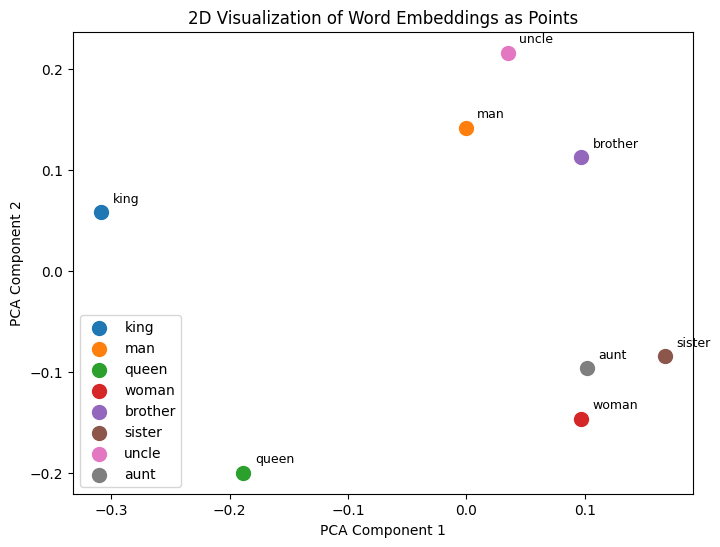

In [41]:
#write your code here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

king_embedding = get_text_embedding("king")
man_embedding = get_text_embedding("man")
queen_embedding = get_text_embedding("queen")
woman_embedding = get_text_embedding("woman")
brother_embedding = get_text_embedding("brother")
sister_embedding = get_text_embedding("sister")
uncle_embedding = get_text_embedding("uncle")
aunt_embedding = get_text_embedding("aunt")
embeddings = [king_embedding, man_embedding, queen_embedding, woman_embedding, brother_embedding, sister_embedding, uncle_embedding, aunt_embedding]
words = ["king", "man", "queen", "woman", "brother", "sister", "uncle", "aunt"]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word, s=100)
    plt.text(reduced_embeddings[i, 0]+0.01, reduced_embeddings[i, 1]+0.01, word, fontsize=9)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Word Embeddings as Points")
plt.legend()
plt.show()


### ب

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد برای ترسیم یک دو بعدی از امبدینگ هاست که کاهش ابعاد پیدا کرده اند.
ابتدا فیگور سایز را تعریف کرده اند. سپس نقاط برای همه کلمات را ترسیم میکنیم. 
enumerate(words) لیست کلمات را پیمایش کرده و برای هر کلمه یک نقطه در مختصات مربوطه از reduced_embeddings رسم می‌کند.
plt.scatter یک نقطه برای هر کلمه در نمودار رسم می‌شود.
plt.text نام کلمه را کمی بالاتر و کنار نقطه مربوط به آن کلمه نمایش می‌دهد تا نقاط بهتر شناخته شوند است. سپس بردار های بین جفت کلمات خاص را رسم میکنیم. pairs لیستی از جفت‌کلمات که باید با بردارهای جهت‌دار به هم متصل شوند.
plt.arrow هم  برای هر جفت‌کلمه یک بردار از مختصات کلمه اول به مختصات کلمه دوم رسم می‌کند. بردارها با رنگ خاکستری و خط چین نمایش داده می‌شوند. همانطور که مشخث است کلمات man , king و کلمات queen و woman باهم مرتبط هستند و بهترین جفت کلمه هایی هستند که بشود بینشان بردار کشید.
همچنین بردار های uncle , aunt و کلمه های brother , sister با هم مرتبط اند.

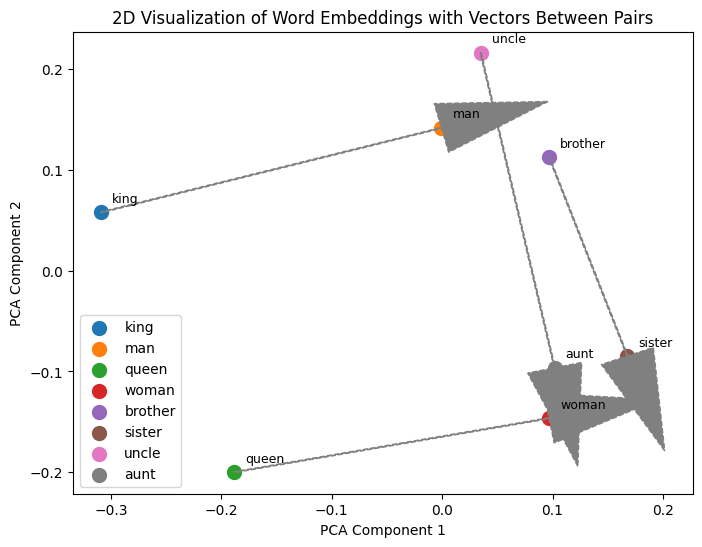

In [42]:
#write your code here

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word, s=100)
    plt.text(reduced_embeddings[i, 0]+0.01, reduced_embeddings[i, 1]+0.01, word, fontsize=9)

pairs = [(0, 1), (2, 3), (4, 5), (6, 7)]  
for pair in pairs:
    plt.arrow(reduced_embeddings[pair[0], 0], reduced_embeddings[pair[0], 1],
              reduced_embeddings[pair[1], 0] - reduced_embeddings[pair[0], 0],
              reduced_embeddings[pair[1], 1] - reduced_embeddings[pair[0], 1],
              head_width=0.05, head_length=0.1, fc='gray', ec='gray', linestyle='--', lw=1)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Word Embeddings with Vectors Between Pairs")
plt.legend()
plt.show()


## *بخش سوم*

توضیحات خود را اینجا بنویسید
<div dir="rtl" style="font-family: Vazir; width: 85%; font-size: 16px;">
این کد به منظور نمایش کلمات و کاهش ابعاد آن به دو بعد نوشته شده است.
ابتدا کتابخانه های مربوطه را ایمپورت کردم و کلمه ها را مشخص کردم. سپس امبدینگ های مربوط به کلمات را تولید کردم. در مرحله بعد ابعاد امبدینگ ها را با [get_text_embedding(word) for word in words] به ۲ کاهش دادم و نمودار مربوط به کلمات را رسم کردم.
همانطور که قابل پیش بینی است کلمات officer , man در نزدیکی هم قرار دارند، کلمات nurse , woman هم در نزدیکی هم قرار دارند و کلمه carpenter در نزدیکی کلمات منتسب به مردان و کلمه homemaker در نزدیکی کلمات منتسب به زنان است. همانطور که مشخص است این مدل دارای سوگیری جنسیتی است و یک سری شغل ها را منتسب به مردان و بعضی شغل ها را منتسب به زنان میداند. دلیل این اتفاق این است که احتمالا منابعی که برای آموزش مدل استفاده شده است این تبعیض شغلی و سوگیری جنسیتی را در خود داشته و مدل بر اساس آن آموزش دیده که منجر به این سوگیری شده.

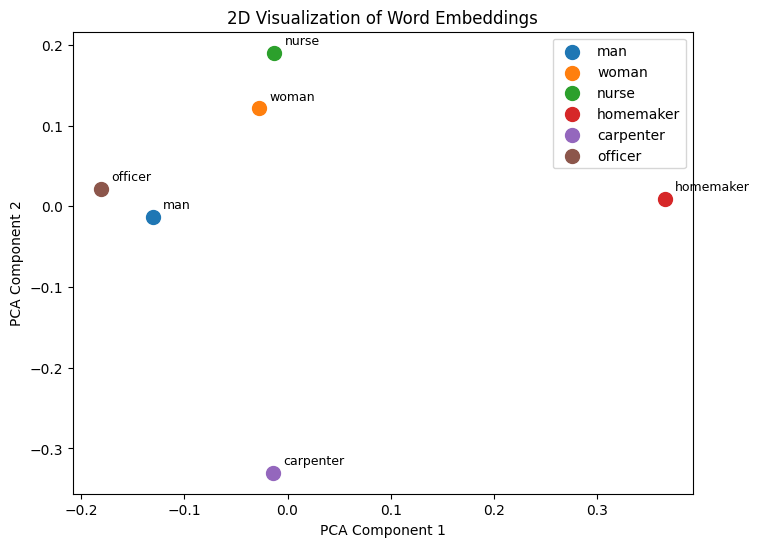

In [43]:
#write your code here

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = ["man", "woman", "nurse", "homemaker", "carpenter", "officer"]
embeddings = [get_text_embedding(word) for word in words]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1], label=word, s=100)
    plt.text(reduced_embeddings[i, 0]+0.01, reduced_embeddings[i, 1]+0.01, word, fontsize=9)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Word Embeddings")
plt.legend()
plt.show()


# **نکات مهم**

<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%; font-size: 16px;">
    <p><strong>مهلت تحویل بدون جریمه:</strong> ۱۹ آبان ۱۴۰۳</p>
    <p><strong>مهلت تحویل با تاخیر (با جریمه):</strong> ۲۶ آبان ۱۴۰۳</p>
</div>

<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>فایل ارسالی شما باید با فرمت زیر نامگذاری شود:
        <code>NLP_CA2_LASTNAME_STUDENTID.ipynb</code>
    </h4>
</div>


<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>نحوه انجام این تمرین:</h4>
    <ul style="font-family: Vazir; font-size: 16px;">
        <li>
            برخی سوالات نیاز به نوشتن کد پایتون و محاسبه نتایج دارند، و بقیه آنها دارای پاسخ‌های نوشتاری هستند.
            برای مسائل کدنویسی، باید تمام بلوک‌های کدی که با
            <code>#WRITE YOUR CODE HERE</code>
            مشخص شده‌اند را تکمیل کنید.
        </li>
        <li>
            برای پاسخ‌های متنی، باید متنی که می‌گوید "پاسخ خود را اینجا بنویسید..." و یا "توضیحات خود را اینجا بنویسید" را با پاسخ واقعی خود جایگزین کنید.
        </li>
        <li>
            ساختار کلی section ها و سوالات را تغییر ندهید ولی در هر قسمت در صورت نیاز برای کد و یا توضیحات می‌توانید cell جدید ایجاد کنید. و پاسخ یا کد خود را در چند cell بنویسید.
        </li>
    </ul>
</div>


<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>صداقت علمی:</h4>
    <ul style="font-family: Vazir; font-size: 16px;">
        <li>
            ما نوت‌بوک‌های تعداد مشخصی از دانشجویان که به صورت تصادفی انتخاب می‌شوند، بررسی خواهیم کرد.
            این بررسی‌ها اطمینان حاصل می‌کنند که کدی که نوشتید واقعاً پاسخ‌های موجود در نوت‌بوک شما را تولید می‌کند.
            اگر پاسخ‌های صحیح را در نوت‌بوک خود بدون کدی که واقعاً آن پاسخ‌ها را تولید کند تحویل دهید،
            این یک مورد جدی از عدم صداقت علمی محسوب می‌شود.
        </li>
        <li>
            ما همچنین بررسی‌های خودکاری را برای تشخیص سرقت علمی در نوت‌بوک‌های کولب انجام خواهیم داد.
            کپی کردن کد از دیگران نیز یک مورد جدی از عدم صداقت علمی محسوب می‌شود.
        </li>
    </ul>
</div>


<div dir="rtl" style="text-align: right; font-family: Vazir; width: 85%;">
    <h4>توضیحات تکمیلی:</h4>
    <ul style="font-family: Vazir; font-size: 16px;">
        <li>
            خوانایی و دقت بررسی‌ها در گزارش نهایی از اهمیت ویژه‌ای برخوردار است. به تمرین‌هایی که به صورت کاغذی تحویل داده شوند یا به صورت عکس در سایت بارگذاری شوند، ترتیب اثری داده نخواهد شد.
        </li>
        <li>
            همه‌ی کدهای پیوست گزارش بایستی قابلیت اجرای مجدد داشته باشند. در صورتی که برای اجرا مجدد آن‌ها نیاز به تنظیمات خاصی می‌باشد، بایستی تنظیمات مورد نیاز را نیز در گزارش خود ذکر کنید.
            دقت کنید که تمامی کدها باید توسط شما اجرا شده باشند و نتایج اجرا در فایل کدهای ارسالی مشخص باشد. به کدهایی که نتایج اجرای آن‌ها در فایل ارسالی مشخص نباشد نمره‌ای تعلق نمی‌گیرد.
        </li>
        <li>
            تمرین تا یک هفته بعد از مهلت تعیین شده با تاخیر تحویل گرفته می‌شود. دقت کنید که شما جمعاً برای تمام تکالیف، ۱۴ روز زمان تحویل بدون جریمه دارید که تنها از ۷ روز آن برای هر تمرین می‌توانید استفاده کنید. در صورتی که این ۱۴ روز به اتمام رسیده باشد، به ازای هر روز تاخیر ده درصد جریمه می‌شود.
        </li>
        <li>
            توجه کنید این تمرین باید به صورت تک‌نفره انجام شود و پاسخ‌های ارائه شده باید نتیجه فعالیت فرد نویسنده باشد (همفکری و به اتفاق هم نوشتن تمرین نیز ممنوع است). در صورت مشاهده
            تشابه به همه افراد مشارکت‌کننده، نمره تمرین صفر و به استاد گزارش می‌گردد.
        </li>
        <li>
            برای مطالعه بیشتر درباره‌ی فرمت مارک‌دون می‌توانید از
            <a href="https://github.com/tajaddini/Persian-Markdown/blob/master/learn-MD.md">این لینک</a>
            مطالعه کنید.
        </li>
    </ul>
</div>
